# 선형 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("RotaryWing.csv")

In [3]:
df.head()

,Company,Name,Length,Width,Height,Weight
0,DJI,MAVIC 2 ZOOM,322.0,242.0,84.0,905
1,DJI,MAVIC 2 PRO,322.0,242.0,84.0,907
2,DJI,PHANTOM 4 PRO,289.5,289.5,196.0,1375
3,DJI,SPARK,143.0,143.0,55.0,300
4,DJI,INSPIRE 2,427.0,317.0,425.0,3440


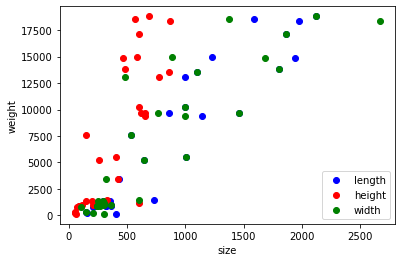

In [4]:
plt.scatter(df["Length"], df["Weight"], color = 'blue', label='length')
plt.scatter(df["Height"], df["Weight"], color = 'red', label='height')
plt.scatter(df["Width"], df["Weight"], color = 'green', label='width')
plt.xlabel('size')
plt.ylabel('weight')
plt.legend(loc='lower right')
plt.show()

In [5]:
df.columns

Index(['Company', 'Name', 'Length', 'Width', 'Height', 'Weight'], dtype='object')

In [6]:
X = df[["Length", "Height", "Width"]]
X_np = X.to_numpy()
y = df["Weight"]
y_np = y.to_numpy()

## 선형 회귀

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(X_np, y_np, random_state=42)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [10]:
print(train_poly.shape)

(22, 9)


In [11]:
poly.get_feature_names()

C:\Users\dovejlee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [12]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9271943135725973


In [14]:
print(lr.score(test_poly, test_target))

0.9116725327316564


In [15]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [16]:
print(train_poly.shape)

(22, 55)


In [17]:
poly.get_feature_names()

C:\Users\dovejlee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [18]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999979522539


In [19]:
print(lr.score(test_poly, test_target))

-13648.737529986645


## 규제 

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지

In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9103319806187008


In [22]:
print(ridge.score(test_scaled, test_target))

0.9501258952039252


In [23]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [24]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

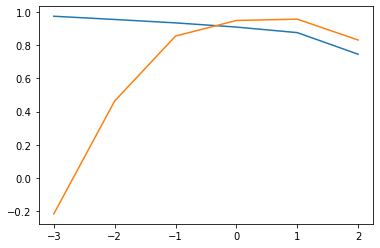

In [25]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [26]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9355593231222457
0.8559820851514883


## 라쏘

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9497094491188443


C:\Users\dovejlee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.209e+07, tolerance: 9.767e+04
  model = cd_fast.enet_coordinate_descent(


In [28]:
print(lasso.score(test_scaled, test_target))

0.5601483028155598


In [29]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\dovejlee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.405e+07, tolerance: 9.767e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\dovejlee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.405e+07, tolerance: 9.767e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\dovejlee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.382e+07,

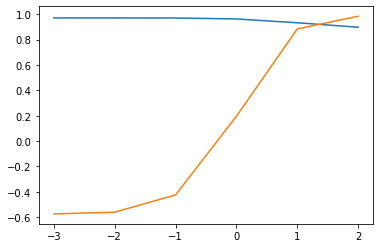

In [30]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [31]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9328744594002213
0.857055331352965


C:\Users\dovejlee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.526e+06, tolerance: 9.767e+04
  model = cd_fast.enet_coordinate_descent(


In [32]:
print(np.sum(lasso.coef_ == 0))

33


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [34]:

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_np, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions using the test set
y_pred = lr.predict(X_test)

In [35]:
X_test

array([[1000.,  600., 1000.],
       [ 305.,  210.,  305.],
       [1100.,  860., 1100.],
       [1800.,  480., 1800.],
       [1860.,  600., 1860.],
       [ 365.,  110.,  365.]])

In [36]:
y_pred

array([ 9124.20649091,  1327.1141149 , 11253.96621648, 15286.89757934,
       16386.79254114,  1339.47040509])

In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

In [38]:
mse

1531379.2668255682

In [39]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8905179474616765
0.9614389004153833


## 다중 회귀

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999979522539


In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_np, test_size=0.2, random_state=42)

# Create and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
# Make predictions using the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score (test data):", r2)

# Make predictions using the training set
y_train_pred = lr.predict(X_train)

# Calculate R-squared value for the training set
r2_train = r2_score(y_train, y_train_pred)
print("R2 Score (train data):", r2_train)

# Predict the weight of a sea bass given its length, height, width
def predict_weight(length, height, width):
    features = np.array([[length, height, width]])
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    features_poly = poly_features.fit_transform(features)
    return lr.predict(features_poly)[0]

length,  height, width = 305.,  210.,  305.  # Example dimensions of a RotaryWing
predicted_weight = predict_weight(length, height, width)
print(f"The predicted weight for a RotaryWing with length {length} cm, height {height} cm, width {width} cm is {predicted_weight:.2f} grams.")


Coefficients: [-1.38495540e+01  1.67061334e+00  1.64244473e+01  3.11422512e-02
  1.83520970e-02 -5.08430329e-02 -1.23106858e-02  1.47622807e-03
  1.69391062e-02]
Intercept: 554.5116669811805
Mean Squared Error: 3791029.675637257
R2 Score (test data): 0.9045394723453984
R2 Score (train data): 0.9275858392239692
The predicted weight for a RotaryWing with length 305.0 cm, height 210.0 cm, width 305.0 cm is 2160.88 grams.


$$
\text{weight} = 554.51 - 13.85 \cdot \text{length} + 1.67 \cdot \text{width} + 16.42 \cdot \text{height} + 0.0311 \cdot \text{length}^2 + 0.0184 \cdot \text{width}^2 - 0.0508 \cdot \text{height}^2 - 0.0123 \cdot \text{length} \cdot \text{width} + 0.00148 \cdot \text{length} \cdot \text{height} + 0.0169 \cdot \text{width} \cdot \text{height}
$$


In [42]:
print(X_poly.shape, X_test.shape)

(30, 9) (6, 9)
